In [2]:
# logistic regression

import numpy as np 
import matplotlib.pyplot as plt

(-10.0, 10.0, -0.1, 1.1)

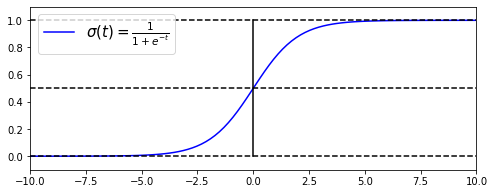

In [104]:
X = np.linspace(-10,10,100)
y = 1/(1+np.exp(-X))
plt.figure(figsize=(8,3))
plt.plot(X,y,"b-", label = r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.legend(loc = "upper left", fontsize=15)
plt.plot(X,np.repeat(0.5,100), "k--")
plt.plot(X,np.repeat(1,100), "k--")
plt.plot(X,np.repeat(0,100), "k--")
plt.plot(np.repeat(0,100),np.linspace(0,1,100), "k-")
plt.plot(0.0,0.5, "r--")
plt.axis([-10, 10, -0.1, 1.1])

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
[0 1]


/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


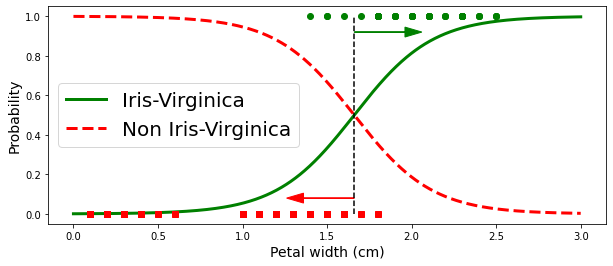

In [112]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
iris = datasets.load_iris()
print(list (iris))
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)
loreg_model = LogisticRegression()
loreg_model.fit (X,y)
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = loreg_model.predict_proba(X_new)
decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]
plt.figure(figsize=(10,4))
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica", lw = 3)
plt.plot(X_new, y_prob[:, 0], "r--", label="Non Iris-Virginica", lw = 3)
plt.plot(np.repeat(decision_boundary,10),np.linspace(0,1,10), "k--")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.legend(loc="center left", fontsize=20)
plt.plot(X[y==1], y[y==1],"go" )
plt.plot(X[y==0], y[y==0],"rs" )
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.savefig("iris_virginica")

print(loreg_model.predict([[1.6],[1.7]]))

Setosa


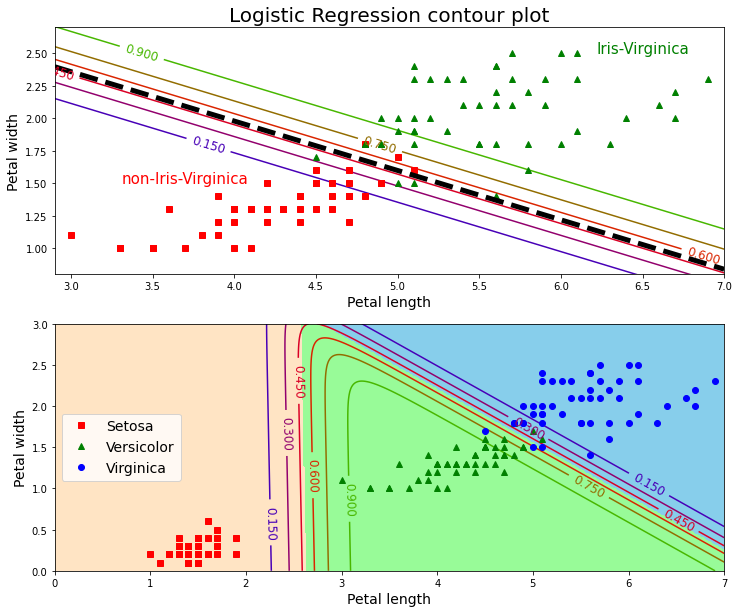

In [290]:
X = iris['data'][:,2:]
y = (iris['target'] == 2).astype(int)
loreg_model = LogisticRegression(solver="liblinear", C=10*10, random_state=42)
loreg_model.fit(X,y)
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_prob=loreg_model.predict_proba(X_new)
plt.figure(figsize=(12, 10))
plt.subplot(211)
plt.plot(X[y==0, 0], X[y==0, 1], "rs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
plt.axis([2.9, 7, 0.8, 2.7])
zz = y_prob[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(loreg_model.coef_[0][0] * left_right + loreg_model.intercept_[0]) / loreg_model.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right,boundary,"k--", lw=5)
plt.text(6.5, 2.5, "Iris-Virginica", horizontalalignment='center', color="g", fontsize=15)
plt.text(3.7, 1.5, "non-Iris-Virginica", horizontalalignment='center', color="r", fontsize=15)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("Logistic Regression contour plot",fontsize=20)


from matplotlib.colors import ListedColormap
X = iris['data'][:,2:]
y = (iris['target']).astype(int)
soft_max = LogisticRegression(multi_class ="multinomial", solver="lbfgs", C= 10, random_state=42)
soft_max.fit(X,y)
x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_prob=soft_max.predict_proba(X_new)
y_pred=soft_max.predict(X_new)
plt.subplot(212)
plt.plot(X[y==0, 0], X[y==0, 1], "rs", label="Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "bo", label="Virginica")
zz = y_pred.reshape(x0.shape)
zz1 = y_prob[:, 1].reshape(x0.shape)
custom_cmap = ListedColormap(['bisque','palegreen','skyblue'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.savefig("lg_contour")

data=[1, 2]
if soft_max.predict([data]) == 2 :
  print("Virginica")
elif soft_max.predict([data]) == 1 :
  print("Versicolor")
else:
  print("Setosa")